# Initial Steps

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\hp\Downloads\1111\Dehire\Wooden\cleaned_monthly_wooden_data.csv", parse_dates=['date'])
df = df.set_index('date')
df

quantity
date                
2019-09-01     21050
2019-10-01     34121
2019-11-01     30100
2019-12-01     52396
2020-01-01     35979
2020-02-01     33208
2020-03-01     51330
2020-04-01     43714
2020-05-01     45012
2020-06-01     88314
2020-07-01     86007
2020-08-01     79449
2020-09-01     75733
2020-10-01     88805
2020-11-01     84784
2020-12-01    107079
2021-01-01     90663
2021-02-01     87891
2021-03-01    106013
2021-04-01     98397
2021-05-01     99696
2021-06-01    142998
2021-07-01    140690
2021-08-01    134132
2021-09-01    130416
2021-10-01    143488
2021-11-01    139467
2021-12-01    161762
2022-01-01    145346
2022-02-01    142575
2022-03-01    160696
2022-04-01    153080
2022-05-01    154379
2022-06-01    197681
2022-07-01    195373
2022-08-01    188816
2022-09-01    185099
2022-10-01    198171
2022-11-01    194150

# Preparing Data For Model Based Forecasting

## Creating T, T_square, Log_T Columns

In [2]:
import numpy as np
pLen = len(df)
df["t"] = np.arange(1,pLen+1)
df["t_square"] = df["t"] * df["t"]
df["log_t"] = np.log(df["quantity"].astype(int)) 
df

quantity   t  t_square      log_t
date                                         
2019-09-01     21050   1         1   9.954656
2019-10-01     34121   2         4  10.437668
2019-11-01     30100   3         9  10.312280
2019-12-01     52396   4        16  10.866586
2020-01-01     35979   5        25  10.490691
2020-02-01     33208   6        36  10.410546
2020-03-01     51330   7        49  10.846031
2020-04-01     43714   8        64  10.685424
2020-05-01     45012   9        81  10.714684
2020-06-01     88314  10       100  11.388654
2020-07-01     86007  11       121  11.362184
2020-08-01     79449  12       144  11.282871
2020-09-01     75733  13       169  11.234969
2020-10-01     88805  14       196  11.394198
2020-11-01     84784  15       225  11.347862
2020-12-01    107079  16       256  11.581322
2021-01-01     90663  17       289  11.414905
2021-02-01     87891  18       324  11.383853
2021-03-01    106013  19       361  11.571317
2021-04-01     98397  20       400  11.496766
2021-05-01     99696  21       441  11.509881
2021-06-01    142998  22       484  11.870586
2021-07-01    140690  23       529  11.854314
2021-08-01    134132  24       576  11.806580
2021-09-01    130416  25       625  11.778485
2021-10-01    143488  26       676  11.874007
2021-11-01    139467  27       729  11.845583
2021-12-01    161762  28       784  11.993881
2022-01-01    145346  29       841  11.886872
2022-02-01    142575  30       900  11.867623
2022-03-01    160696  31       961  11.987270
2022-04-01    153080  32      1024  11.938716
2022-05-01    154379  33      1089  11.947166
2022-06-01    197681  34      1156  12.194410
2022-07-01    195373  35      1225  12.182666
2022-08-01    188816  36      1296  12.148528
2022-09-01    185099  37      1369  12.128646
2022-10-01    198171  38      1444  12.196886
2022-11-01    194150  39      1521  12.176386

## Creating Month Dummy Variables

In [3]:
df['date'] = df.index
df['Month'] = pd.to_datetime(df.date, format='%m').dt.strftime('%b')
month_dummies = pd.DataFrame(pd.get_dummies(df['Month']))
df = df.drop(['date','Month'], axis=1)
df1 = pd.concat([df, month_dummies], axis = 1)
df1

quantity   t  t_square      log_t  Apr  Aug  Dec  Feb  Jan  Jul  \
date                                                                          
2019-09-01     21050   1         1   9.954656    0    0    0    0    0    0   
2019-10-01     34121   2         4  10.437668    0    0    0    0    0    0   
2019-11-01     30100   3         9  10.312280    0    0    0    0    0    0   
2019-12-01     52396   4        16  10.866586    0    0    1    0    0    0   
2020-01-01     35979   5        25  10.490691    0    0    0    0    1    0   
2020-02-01     33208   6        36  10.410546    0    0    0    1    0    0   
2020-03-01     51330   7        49  10.846031    0    0    0    0    0    0   
2020-04-01     43714   8        64  10.685424    1    0    0    0    0    0   
2020-05-01     45012   9        81  10.714684    0    0    0    0    0    0   
2020-06-01     88314  10       100  11.388654    0    0    0    0    0    0   
2020-07-01     86007  11       121  11.362184    0    0    0    0    0    1   
2020-08-01     79449  12       144  11.282871    0    1    0    0    0    0   
2020-09-01     75733  13       169  11.234969    0    0    0    0    0    0   
2020-10-01     88805  14       196  11.394198    0    0    0    0    0    0   
2020-11-01     84784  15       225  11.347862    0    0    0    0    0    0   
2020-12-01    107079  16       256  11.581322    0    0    1    0    0    0   
2021-01-01     90663  17       289  11.414905    0    0    0    0    1    0   
2021-02-01     87891  18       324  11.383853    0    0    0    1    0    0   
2021-03-01    106013  19       361  11.571317    0    0    0    0    0    0   
2021-04-01     98397  20       400  11.496766    1    0    0    0    0    0   
2021-05-01     99696  21       441  11.509881    0    0    0    0    0    0   
2021-06-01    142998  22       484  11.870586    0    0    0    0    0    0   
2021-07-01    140690  23       529  11.854314    0    0    0    0    0    1   
2021-08-01    134132  24       576  11.806580    0    1    0    0    0    0   
2021-09-01    130416  25       625  11.778485    0    0    0    0    0    0   
2021-10-01    143488  26       676  11.874007    0    0    0    0    0    0   
2021-11-01    139467  27       729  11.845583    0    0    0    0    0    0   
2021-12-01    161762  28       784  11.993881    0    0    1    0    0    0   
2022-01-01    145346  29       841  11.886872    0    0    0    0    1    0   
2022-02-01    142575  30       900  11.867623    0    0    0    1    0    0   
2022-03-01    160696  31       961  11.987270    0    0    0    0    0    0   
2022-04-01    153080  32      1024  11.938716    1    0    0    0    0    0   
2022-05-01    154379  33      1089  11.947166    0    0    0    0    0    0   
2022-06-01    197681  34      1156  12.194410    0    0    0    0    0    0   
2022-07-01    195373  35      1225  12.182666    0    0    0    0    0    1   
2022-08-01    188816  36      1296  12.148528    0    1    0    0    0    0   
2022-09-01    185099  37      1369  12.128646    0    0    0    0    0    0   
2022-10-01    198171  38      1444  12.196886    0    0    0    0    0    0   
2022-11-01    194150  39      1521  12.176386    0    0    0    0    0    0   

            Jun  Mar  May  Nov  Oct  Sep  
date                                      
2019-09-01    0    0    0    0    0    1  
2019-10-01    0    0    0    0    1    0  
2019-11-01    0    0    0    1    0    0  
2019-12-01    0    0    0    0    0    0  
2020-01-01    0    0    0    0    0    0  
2020-02-01    0    0    0    0    0    0  
2020-03-01    0    1    0    0    0    0  
2020-04-01    0    0    0    0    0    0  
2020-05-01    0    0    1    0    0    0  
2020-06-01    1    0    0    0    0    0  
2020-07-01    0    0    0    0    0    0  
2020-08-01    0    0    0    0    0    0  
2020-09-01    0    0    0    0    0    1  
2020-10-01    0    0    0    0    1    0  
2020-11-01    0    0    0    1    0    0  
2020-12-01    0    0    0    0    0    0 

## Splitting Prepared Data

In [4]:
Train = df1.drop(df1.tail(12).index)
Train

quantity   t  t_square      log_t  Apr  Aug  Dec  Feb  Jan  Jul  \
date                                                                          
2019-09-01     21050   1         1   9.954656    0    0    0    0    0    0   
2019-10-01     34121   2         4  10.437668    0    0    0    0    0    0   
2019-11-01     30100   3         9  10.312280    0    0    0    0    0    0   
2019-12-01     52396   4        16  10.866586    0    0    1    0    0    0   
2020-01-01     35979   5        25  10.490691    0    0    0    0    1    0   
2020-02-01     33208   6        36  10.410546    0    0    0    1    0    0   
2020-03-01     51330   7        49  10.846031    0    0    0    0    0    0   
2020-04-01     43714   8        64  10.685424    1    0    0    0    0    0   
2020-05-01     45012   9        81  10.714684    0    0    0    0    0    0   
2020-06-01     88314  10       100  11.388654    0    0    0    0    0    0   
2020-07-01     86007  11       121  11.362184    0    0    0    0    0    1   
2020-08-01     79449  12       144  11.282871    0    1    0    0    0    0   
2020-09-01     75733  13       169  11.234969    0    0    0    0    0    0   
2020-10-01     88805  14       196  11.394198    0    0    0    0    0    0   
2020-11-01     84784  15       225  11.347862    0    0    0    0    0    0   
2020-12-01    107079  16       256  11.581322    0    0    1    0    0    0   
2021-01-01     90663  17       289  11.414905    0    0    0    0    1    0   
2021-02-01     87891  18       324  11.383853    0    0    0    1    0    0   
2021-03-01    106013  19       361  11.571317    0    0    0    0    0    0   
2021-04-01     98397  20       400  11.496766    1    0    0    0    0    0   
2021-05-01     99696  21       441  11.509881    0    0    0    0    0    0   
2021-06-01    142998  22       484  11.870586    0    0    0    0    0    0   
2021-07-01    140690  23       529  11.854314    0    0    0    0    0    1   
2021-08-01    134132  24       576  11.806580    0    1    0    0    0    0   
2021-09-01    130416  25       625  11.778485    0    0    0    0    0    0   
2021-10-01    143488  26       676  11.874007    0    0    0    0    0    0   
2021-11-01    139467  27       729  11.845583    0    0    0    0    0    0   

            Jun  Mar  May  Nov  Oct  Sep  
date                                      
2019-09-01    0    0    0    0    0    1  
2019-10-01    0    0    0    0    1    0  
2019-11-01    0    0    0    1    0    0  
2019-12-01    0    0    0    0    0    0  
2020-01-01    0    0    0    0    0    0  
2020-02-01    0    0    0    0    0    0  
2020-03-01    0    1    0    0    0    0  
2020-04-01    0    0    0    0    0    0  
2020-05-01    0    0    1    0    0    0  
2020-06-01    1    0    0    0    0    0  
2020-07-01    0    0    0    0    0    0  
2020-08-01    0    0    0    0    0    0  
2020-09-01    0    0    0    0    0    1  
2020-10-01    0    0    0    0    1    0  
2020-11-01    0    0    0    1    0    0  
2020-12-01    0    0    0    0    0    0  
2021-01-01    0    0    0    0    0    0  
2021-02-01    0    0    0    0    0    0  
2021-03-01    0    1    0    0    0    0  
2021-04-01    0    0    0    0    0    0  
2021-05-01    0    0    1    0    0    0  
2021-06-01    1    0    0    0    0    0  
2021-07-01    0    0    0    0    0    0  
2021-08-01    0    0    0    0    0    0  
2021-09-01    0    0    0    0    0    1  
2021-10-01    0    0    0    0    1    0  
2021-11-01    0    0    0    1    0    0

In [5]:
Train.to_csv('Train_wooden.csv')

In [6]:
Test = df1.tail(12)
Test

quantity   t  t_square      log_t  Apr  Aug  Dec  Feb  Jan  Jul  \
date                                                                          
2021-12-01    161762  28       784  11.993881    0    0    1    0    0    0   
2022-01-01    145346  29       841  11.886872    0    0    0    0    1    0   
2022-02-01    142575  30       900  11.867623    0    0    0    1    0    0   
2022-03-01    160696  31       961  11.987270    0    0    0    0    0    0   
2022-04-01    153080  32      1024  11.938716    1    0    0    0    0    0   
2022-05-01    154379  33      1089  11.947166    0    0    0    0    0    0   
2022-06-01    197681  34      1156  12.194410    0    0    0    0    0    0   
2022-07-01    195373  35      1225  12.182666    0    0    0    0    0    1   
2022-08-01    188816  36      1296  12.148528    0    1    0    0    0    0   
2022-09-01    185099  37      1369  12.128646    0    0    0    0    0    0   
2022-10-01    198171  38      1444  12.196886    0    0    0    0    0    0   
2022-11-01    194150  39      1521  12.176386    0    0    0    0    0    0   

            Jun  Mar  May  Nov  Oct  Sep  
date                                      
2021-12-01    0    0    0    0    0    0  
2022-01-01    0    0    0    0    0    0  
2022-02-01    0    0    0    0    0    0  
2022-03-01    0    1    0    0    0    0  
2022-04-01    0    0    0    0    0    0  
2022-05-01    0    0    1    0    0    0  
2022-06-01    1    0    0    0    0    0  
2022-07-01    0    0    0    0    0    0  
2022-08-01    0    0    0    0    0    0  
2022-09-01    0    0    0    0    0    1  
2022-10-01    0    0    0    0    1    0  
2022-11-01    0    0    0    1    0    0

In [7]:
Test.to_csv('test_wooden.csv')

# Model Building

## 1. Linear Regression

In [8]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('quantity ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(pred_linear))**2))
rmse_linear

12040.714108389151

## 2. Exponential Regression

In [9]:
Exp = smf.ols('log_t ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

104316.45744279589

## 3. Quadratic Regression

In [10]:
Quad = smf.ols('quantity ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(pred_Quad))**2))
rmse_Quad

12178.316513302878

## 4. Additive Seasonality

In [11]:
add_sea = smf.ols('quantity ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(pred_add_sea))**2))
rmse_add_sea

89645.43735649883

## 5. Multiplicative Seasonality

In [12]:
Mul_sea = smf.ols('log_t ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

97439.32285650696

## 6. Additive Seasonality Quadratic Trend

In [13]:
add_sea_Quad = smf.ols('quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['quantity'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

0.43773709252123777

## 7. Multiplicative Seasonality Linear Trend

In [14]:
Mul_Add_sea = smf.ols('log_t ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['quantity']) - np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

104554.62056753505

# Testing & Checking Best Model

In [15]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse

MODEL    RMSE_Values
0        rmse_linear   12040.714108
1           rmse_Exp  104316.457443
2          rmse_Quad   12178.316513
3       rmse_add_sea   89645.437356
4  rmse_add_sea_quad       0.437737
5      rmse_Mult_sea   97439.322857
6  rmse_Mult_add_sea  104554.620568

# Forecasting

## 1. Getting Data For Forecasting

In [16]:
forecast_data_path = "C:/Users/hp/Downloads/1111/Dehire/Wooden/wooden_data_to_forecast.csv"

In [17]:
df2 = pd.read_csv(forecast_data_path, parse_dates=['date'])
df2

date
0  2022-12-01
1  2023-01-01
2  2023-02-01
3  2023-03-01
4  2023-04-01
5  2023-05-01
6  2023-06-01
7  2023-07-01
8  2023-08-01
9  2023-09-01
10 2023-10-01
11 2023-11-01

## 2. Getting Data Ready

In [18]:
df2['date'] = pd.date_range("2022-12-01", periods=12, freq="MS")
df2['Month'] = pd.to_datetime(df2.date, format='%m').dt.strftime('%b')
month_dummies = pd.DataFrame(pd.get_dummies(df2['Month']))
df2 = df2.drop(['Month'], axis=1)
df2 = pd.concat([df2, month_dummies], axis = 1)
pLen1 = len(df2)
df2["t"] = np.arange(37,pLen1+1+36)
df2["t_square"] = df2["t"] * df2["t"]
df2 = df2.set_index('date')
df2

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep   t  \
date                                                                         
2022-12-01    0    0    1    0    0    0    0    0    0    0    0    0  37   
2023-01-01    0    0    0    0    1    0    0    0    0    0    0    0  38   
2023-02-01    0    0    0    1    0    0    0    0    0    0    0    0  39   
2023-03-01    0    0    0    0    0    0    0    1    0    0    0    0  40   
2023-04-01    1    0    0    0    0    0    0    0    0    0    0    0  41   
2023-05-01    0    0    0    0    0    0    0    0    1    0    0    0  42   
2023-06-01    0    0    0    0    0    0    1    0    0    0    0    0  43   
2023-07-01    0    0    0    0    0    1    0    0    0    0    0    0  44   
2023-08-01    0    1    0    0    0    0    0    0    0    0    0    0  45   
2023-09-01    0    0    0    0    0    0    0    0    0    0    0    1  46   
2023-10-01    0    0    0    0    0    0    0    0    0    0    1    0  47   
2023-11-01    0    0    0    0    0    0    0    0    0    1    0    0  48   

            t_square  
date                  
2022-12-01      1369  
2023-01-01      1444  
2023-02-01      1521  
2023-03-01      1600  
2023-04-01      1681  
2023-05-01      1764  
2023-06-01      1849  
2023-07-01      1936  
2023-08-01      2025  
2023-09-01      2116  
2023-10-01      2209  
2023-11-01      2304

## 3. Best Model

In [19]:
model_full = smf.ols('quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=df1).fit()

In [20]:
model_full.save("model.pickle")

In [21]:
# to load model
from statsmodels.regression.linear_model import OLSResults
model = OLSResults.load("model.pickle")

## 4. Forecasting

In [22]:
pred_new = pd.Series(model_full.predict(df2))
pred_new

date
2022-12-01    202774.574708
2023-01-01    186358.217757
2023-02-01    183586.860805
2023-03-01    201708.503854
2023-04-01    194092.480235
2023-05-01    195391.123284
2023-06-01    238693.099665
2023-07-01    236385.409381
2023-08-01    229827.719096
2023-09-01    226111.517097
2023-10-01    239183.236730
2023-11-01    235162.206364
dtype: float64

In [23]:
df2["forecasted_quantity"] = pd.Series(pred_new)
df2

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep   t  \
date                                                                         
2022-12-01    0    0    1    0    0    0    0    0    0    0    0    0  37   
2023-01-01    0    0    0    0    1    0    0    0    0    0    0    0  38   
2023-02-01    0    0    0    1    0    0    0    0    0    0    0    0  39   
2023-03-01    0    0    0    0    0    0    0    1    0    0    0    0  40   
2023-04-01    1    0    0    0    0    0    0    0    0    0    0    0  41   
2023-05-01    0    0    0    0    0    0    0    0    1    0    0    0  42   
2023-06-01    0    0    0    0    0    0    1    0    0    0    0    0  43   
2023-07-01    0    0    0    0    0    1    0    0    0    0    0    0  44   
2023-08-01    0    1    0    0    0    0    0    0    0    0    0    0  45   
2023-09-01    0    0    0    0    0    0    0    0    0    0    0    1  46   
2023-10-01    0    0    0    0    0    0    0    0    0    0    1    0  47   
2023-11-01    0    0    0    0    0    0    0    0    0    1    0    0  48   

            t_square  forecasted_quantity  
date                                       
2022-12-01      1369        202774.574708  
2023-01-01      1444        186358.217757  
2023-02-01      1521        183586.860805  
2023-03-01      1600        201708.503854  
2023-04-01      1681        194092.480235  
2023-05-01      1764        195391.123284  
2023-06-01      1849        238693.099665  
2023-07-01      1936        236385.409381  
2023-08-01      2025        229827.719096  
2023-09-01      2116        226111.517097  
2023-10-01      2209        239183.236730  
2023-11-01      2304        235162.206364

## 5. Finding Residuals

In [24]:
full_res = df1.quantity - model_full.predict(df1)
full_res

date
2019-09-01    0.464857
2019-10-01   -0.305387
2019-11-01   -0.325631
2019-12-01    0.323401
2020-01-01   -0.356762
2020-02-01   -0.036925
2020-03-01    0.282913
2020-04-01    0.269417
2020-05-01   -0.410746
2020-06-01   -0.424242
2020-07-01    0.228928
2020-08-01   -0.117901
2020-09-01    0.046983
2020-10-01    0.290235
2020-11-01    0.283487
2020-12-01   -0.053985
2021-01-01    0.279349
2021-02-01   -0.387318
2021-03-01   -0.053985
2021-04-01   -0.053985
2021-05-01    0.279349
2021-06-01    0.279349
2021-07-01   -0.053985
2021-08-01   -0.387318
2021-09-01   -0.208937
2021-10-01    0.047811
2021-11-01    0.054559
2021-12-01   -0.269417
2022-01-01    0.077413
2022-02-01    0.424242
2022-03-01   -0.228928
2022-04-01   -0.215432
2022-05-01    0.131398
2022-06-01    0.144894
2022-07-01   -0.174944
2022-08-01    0.505219
2022-09-01   -0.302904
2022-10-01   -0.032659
2022-11-01   -0.012415
dtype: float64

## 6. ACF Plot on Residuals

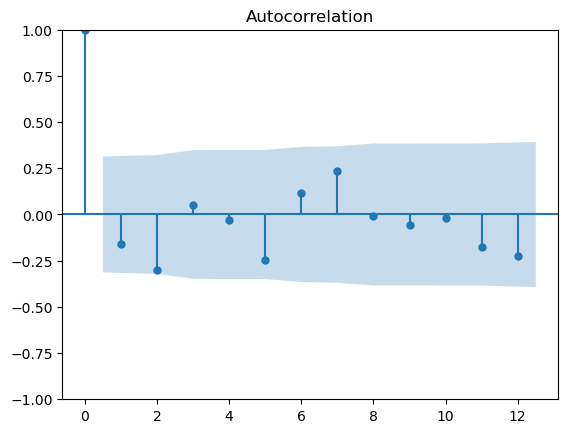

In [25]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(full_res, lags = 12);

## 7. PACF Plot on Residuals

In [26]:
tsa_plots.plot_pacf(full_res, lags=12);

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


## 8. Autoregression Model

In [27]:
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[5])
# model_ar = AutoReg(Train_res, lags=5)
model_fit = model_ar.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [28]:
print('Coefficients: %s' % model_fit.params)
pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(df2)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)
pred_res

Coefficients: const    0.006016
y.L5    -0.283559
dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


0     0.055623
1    -0.137244
2     0.091907
3     0.015277
4     0.009536
5    -0.009756
6     0.044933
7    -0.020045
8     0.001684
9     0.003312
10    0.008782
11   -0.006725
dtype: float64

In [29]:
df3 = pd.concat([df2.reset_index(), pred_res], axis=1)
df3 = df3.set_index('date')
df3 = df3.rename(columns = {0:'Residuals'})
df3

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep   t  \
date                                                                         
2022-12-01    0    0    1    0    0    0    0    0    0    0    0    0  37   
2023-01-01    0    0    0    0    1    0    0    0    0    0    0    0  38   
2023-02-01    0    0    0    1    0    0    0    0    0    0    0    0  39   
2023-03-01    0    0    0    0    0    0    0    1    0    0    0    0  40   
2023-04-01    1    0    0    0    0    0    0    0    0    0    0    0  41   
2023-05-01    0    0    0    0    0    0    0    0    1    0    0    0  42   
2023-06-01    0    0    0    0    0    0    1    0    0    0    0    0  43   
2023-07-01    0    0    0    0    0    1    0    0    0    0    0    0  44   
2023-08-01    0    1    0    0    0    0    0    0    0    0    0    0  45   
2023-09-01    0    0    0    0    0    0    0    0    0    0    0    1  46   
2023-10-01    0    0    0    0    0    0    0    0    0    0    1    0  47   
2023-11-01    0    0    0    0    0    0    0    0    0    1    0    0  48   

            t_square  forecasted_quantity  Residuals  
date                                                  
2022-12-01      1369        202774.574708   0.055623  
2023-01-01      1444        186358.217757  -0.137244  
2023-02-01      1521        183586.860805   0.091907  
2023-03-01      1600        201708.503854   0.015277  
2023-04-01      1681        194092.480235   0.009536  
2023-05-01      1764        195391.123284  -0.009756  
2023-06-01      1849        238693.099665   0.044933  
2023-07-01      1936        236385.409381  -0.020045  
2023-08-01      2025        229827.719096   0.001684  
2023-09-01      2116        226111.517097   0.003312  
2023-10-01      2209        239183.236730   0.008782  
2023-11-01      2304        235162.206364  -0.006725

In [30]:
df3['final_forecast'] = df3['Residuals'] + df3['forecasted_quantity']
df3

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep   t  \
date                                                                         
2022-12-01    0    0    1    0    0    0    0    0    0    0    0    0  37   
2023-01-01    0    0    0    0    1    0    0    0    0    0    0    0  38   
2023-02-01    0    0    0    1    0    0    0    0    0    0    0    0  39   
2023-03-01    0    0    0    0    0    0    0    1    0    0    0    0  40   
2023-04-01    1    0    0    0    0    0    0    0    0    0    0    0  41   
2023-05-01    0    0    0    0    0    0    0    0    1    0    0    0  42   
2023-06-01    0    0    0    0    0    0    1    0    0    0    0    0  43   
2023-07-01    0    0    0    0    0    1    0    0    0    0    0    0  44   
2023-08-01    0    1    0    0    0    0    0    0    0    0    0    0  45   
2023-09-01    0    0    0    0    0    0    0    0    0    0    0    1  46   
2023-10-01    0    0    0    0    0    0    0    0    0    0    1    0  47   
2023-11-01    0    0    0    0    0    0    0    0    0    1    0    0  48   

            t_square  forecasted_quantity  Residuals  final_forecast  
date                                                                  
2022-12-01      1369        202774.574708   0.055623   202774.630331  
2023-01-01      1444        186358.217757  -0.137244   186358.080513  
2023-02-01      1521        183586.860805   0.091907   183586.952712  
2023-03-01      1600        201708.503854   0.015277   201708.519130  
2023-04-01      1681        194092.480235   0.009536   194092.489772  
2023-05-01      1764        195391.123284  -0.009756   195391.113527  
2023-06-01      1849        238693.099665   0.044933   238693.144598  
2023-07-01      1936        236385.409381  -0.020045   236385.389335  
2023-08-01      2025        229827.719096   0.001684   229827.720780  
2023-09-01      2116        226111.517097   0.003312   226111.520408  
2023-10-01      2209        239183.236730   0.008782   239183.245513  
2023-11-01      2304        235162.206364  -0.006725   235162.199639

In [31]:
df3 = df3[['forecasted_quantity','Residuals','final_forecast']]
df3

forecasted_quantity  Residuals  final_forecast
date                                                      
2022-12-01        202774.574708   0.055623   202774.630331
2023-01-01        186358.217757  -0.137244   186358.080513
2023-02-01        183586.860805   0.091907   183586.952712
2023-03-01        201708.503854   0.015277   201708.519130
2023-04-01        194092.480235   0.009536   194092.489772
2023-05-01        195391.123284  -0.009756   195391.113527
2023-06-01        238693.099665   0.044933   238693.144598
2023-07-01        236385.409381  -0.020045   236385.389335
2023-08-01        229827.719096   0.001684   229827.720780
2023-09-01        226111.517097   0.003312   226111.520408
2023-10-01        239183.236730   0.008782   239183.245513
2023-11-01        235162.206364  -0.006725   235162.199639

# Forecasting Result

In [32]:
df1.quantity.plot()
df3.final_forecast.plot()

<AxesSubplot:xlabel='date'>

# Saving Forecasted Data

In [33]:
df3.to_csv('Model_Based_Forecasted_Data.csv',encoding='utf-8')
import os
os.getcwd()

'C:\\Users\\hp\\Downloads\\1111\\Dehire\\Wooden\\Model_Based_forecasting'